In [62]:
import os
import librosa
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [63]:
# Mac OS
#os.chdir(r"/Users/jordanlee/Code/School/CSCI416/music-genre-classification")
#print("Current Working Directory:", os.getcwd())

# Windows
os.chdir(r"C:\Code\School\CSCI416\music_genre_classification\music-genre-classification")
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Code\School\CSCI416\music_genre_classification\music-genre-classification


In [64]:
# Load the CSV
data_path = 'data/features/features.csv'
df = pd.read_csv(data_path)

# Strip brackets and convert to float where applicable
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is a string
        try:
            df[col] = df[col].str.strip('[]').astype(float)  # Remove brackets and convert to float
        except ValueError:
            print(f"Skipping column '{col}' as it contains non-numeric data.")

# Save the cleaned data back to CSV (optional)
df.to_csv('data/features/features_cleaned.csv', index=False)

Skipping column 'label' as it contains non-numeric data.


In [65]:
df = pd.read_csv('data/features/features_cleaned.csv')

print(df.head())

   length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  661794          0.350129         0.088772  0.130184  0.002828   
1  661794          0.340849         0.094976  0.095908  0.002373   
2  661794          0.363538         0.085257  0.175473  0.002751   
3  661794          0.404854         0.093999  0.141040  0.006348   
4  661794          0.308526         0.087843  0.091501  0.002305   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1784.122641          129745.484419              2002.412407   
1             1530.261767          375915.508778              2038.987608   
2             1552.832481          156471.010904              1747.754087   
3             1070.153418          184366.009438              1596.422564   
4             1835.128513          343249.495746              1748.410758   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0            85834.410406   3805.723030  ...   52.42453

In [66]:
X = df.drop(columns=['label'])
y = df['label']

In [67]:
label_encoder =LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [70]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [72]:
joblib.dump(rf_model, 'models/random_forest_model.joblib')
joblib.dump(svm_model, 'models/svm_model.joblib')

['models/svm_model.joblib']

In [73]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.80      1.00      0.89        12
           2       0.75      0.62      0.68        24
           3       0.94      0.77      0.85        22
           4       0.71      0.80      0.75        15
           5       0.93      0.93      0.93        27
           6       0.90      1.00      0.95        18
           7       0.80      0.84      0.82        19
           8       0.77      0.77      0.77        22
           9       0.40      0.40      0.40        20

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200

Accuracy: 0.785


In [74]:
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.73      0.92      0.81        12
           2       0.76      0.67      0.71        24
           3       0.56      0.64      0.60        22
           4       0.71      0.80      0.75        15
           5       0.92      0.85      0.88        27
           6       0.76      0.89      0.82        18
           7       0.94      0.84      0.89        19
           8       0.74      0.64      0.68        22
           9       0.50      0.40      0.44        20

    accuracy                           0.74       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.74      0.74      0.74       200

Accuracy: 0.74


In [75]:
label_names = sorted(df['label'].unique())

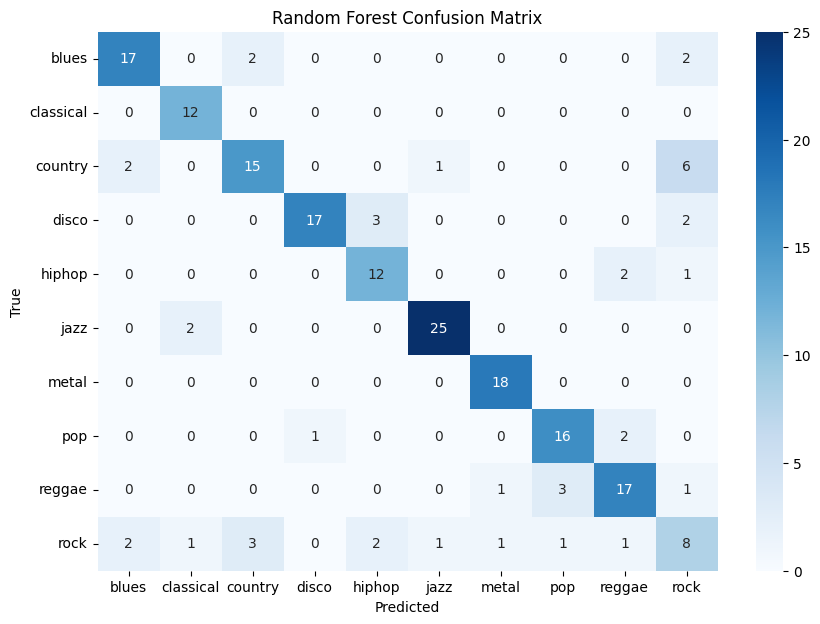

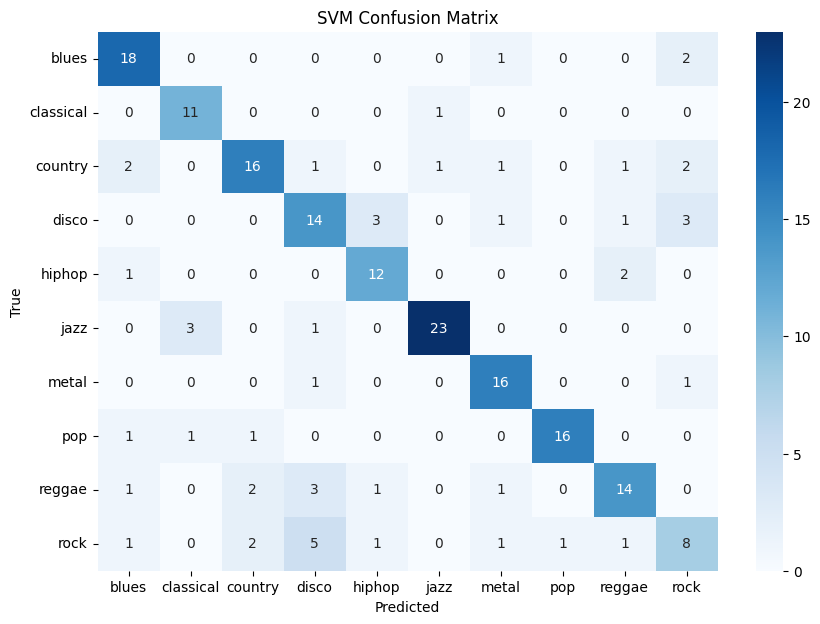

In [76]:
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix for SVM
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

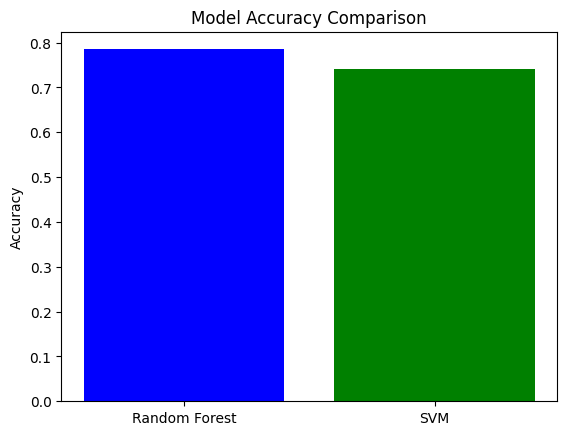

In [77]:
# Calculate accuracy for each model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Create a bar plot for comparison
models = ['Random Forest', 'SVM']
accuracies = [accuracy_rf, accuracy_svm]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

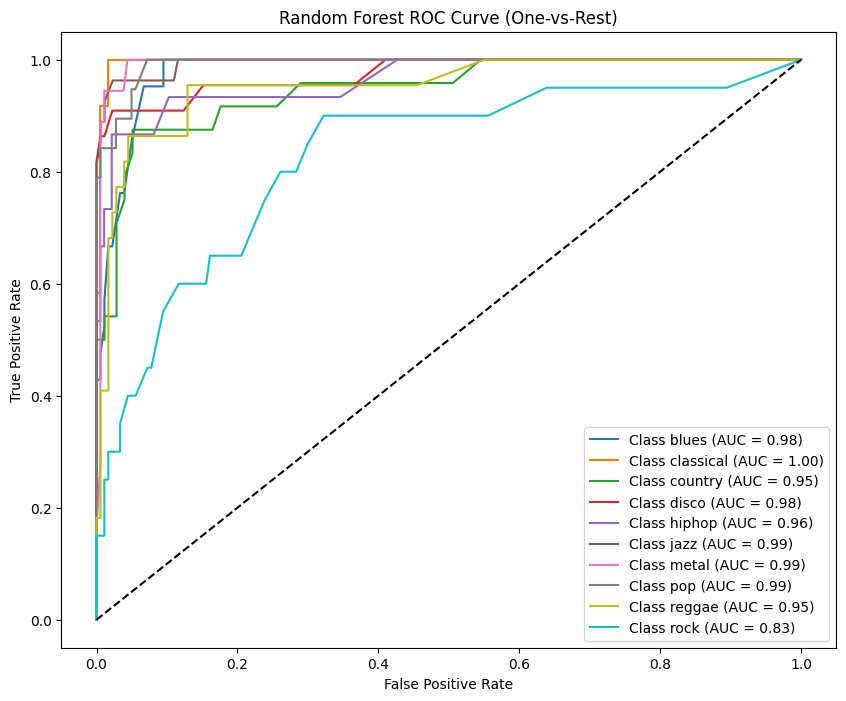

In [78]:
# For Random Forest
n_classes = len(label_names)  # Number of classes (genres)
y_score_rf = rf_model.predict_proba(X_test)  # Get probabilities for each class

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_score_rf[:, i])  # One-vs-Rest
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.show()

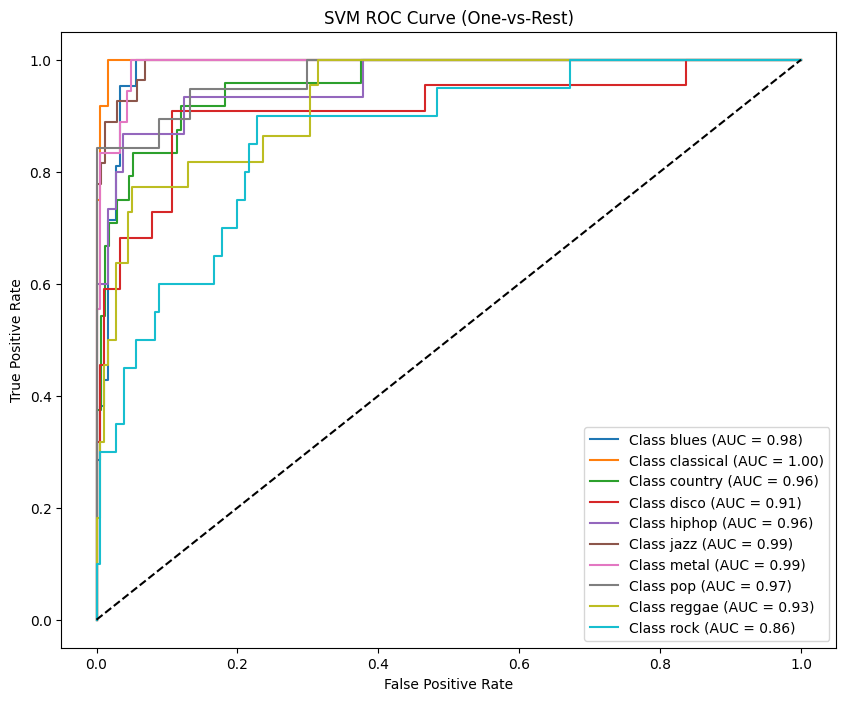

In [79]:
# For SVM
y_score_svm = svm_model.predict_proba(X_test)  # Get probabilities for each class

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_score_svm[:, i])  # One-vs-Rest
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.show()

In [80]:
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest CV Scores:", cv_scores_rf)

# Cross-validation for SVM
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5)
print("SVM CV Scores:", cv_scores_svm)

Random Forest CV Scores: [0.76875    0.79375    0.775      0.7625     0.75471698]
SVM CV Scores: [0.65625    0.71875    0.75       0.66875    0.67295597]
